In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook

### Import data

In [2]:
csv_wt_500ugml = pd.read_csv('csv/20220128_Par2Ring_WT_S75_500ugml.csv')
csv_wt_750ugml = pd.read_csv('csv/20220128_Par2Ring_WT_S75_750ugml.csv')
csv_wt_2000ugml = pd.read_csv('csv/20210927_Par2Ring_WT_S75_2mgml.csv')
csv_wt_5000ugml = pd.read_csv('csv/20210924_Par2Ring_WT_S75_5mgml.csv')
csv_wt_10000ugml = pd.read_csv('csv/20220131_Par2Ring_WT_S75_10mgml.csv')

csv_L109R = pd.read_csv('csv/20210924_Par2Ring_L109R_S75.csv')

csv_lysozyme = pd.read_csv('csv/20210924_Lysozyme_S75_test.csv')

### Function

In [3]:
def create_fig(csv, ylim1=None, ylim2=[0,25], xlim=[10.5, 13.5], mw_xlim=None, c='tab:blue', 
               fig=None, ax1=None, ax2=None):
    
    # Create figure
    if fig is None:
        fig, ax1 = plt.subplots()
        ax2=ax1.twinx()
    
    # Modify csv
    csv.columns = ['Time', 'RIU', 'Molar mass']
    csv.replace(' ', 'NaN', inplace=True)
    csv['Molar mass'] = csv['Molar mass'].astype(float)
    
    # Auto mol weight limits
    if mw_xlim == None:
        max_riu = np.max(csv.RIU[(csv.Time * 0.5 > xlim[0]) * (csv.Time * 0.5 < xlim[1])])
        thresh = 0.8 * max_riu 
        mw_xlim = csv.Time.values[np.abs(np.diff(np.sign(csv.RIU.values - thresh), prepend=0)) == 2] * 0.5
    
    # Crop mol weight data
    mw_bool = (csv.Time.values * 0.5 > mw_xlim[0]) * (csv.Time.values * 0.5 < mw_xlim[1])
    
    # Plot data    
    ax1.plot(csv.Time * 0.5, csv.RIU * 10000, c=c, linewidth=1)
    ax2.plot((csv.Time)[mw_bool] * 0.5, csv['Molar mass'][mw_bool] / 1000, c=c, linestyle='dotted')
    
    # Add monomer/dimer
    ax2.axhline(9.23474, c='k', linestyle='--', linewidth=0.5, zorder=0)
    ax2.axhline(9.23474 * 2, c='k', linestyle='--', linewidth=0.5, zorder=0)
    ax2.text(13.4, 9.5, 'Monomer', horizontalalignment='right',verticalalignment='bottom', fontsize=8)
    ax2.text(13.4, 18.7, 'Dimer', horizontalalignment='right',verticalalignment='bottom', fontsize=8)

    # Set lims
    if ylim1 is not None:
        ax1.set_ylim(*ylim1)
    else:
        ax1.set_ylim([0, 
                      1.1 * np.max(csv.RIU.values[(csv.Time * 0.5 > xlim[0]) * (csv.Time * 0.5 < xlim[1])] * 10000)])
    ax2.set_ylim(*ylim2)
    ax1.set_xlim(*xlim) 
    
    # Finalise fig
    ax1.set_xlabel('Retention volume (ml)')
    ax1.set_ylabel('Refractive index (x 10⁴)')
    ax2.set_ylabel('Molar mass (kDa)')
    ax1.tick_params(axis='both', labelsize=8)
    ax2.tick_params(axis='both', labelsize=8)
    fig.set_size_inches(4,3)
    fig.tight_layout()
    
    return fig, ax1, ax2

### Individual panels

<IPython.core.display.Javascript object>


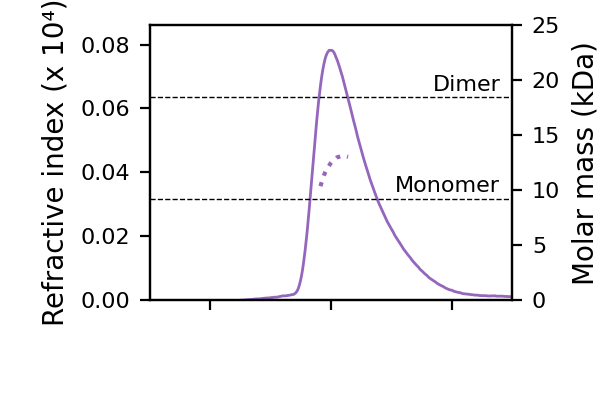

/Users/blandt/anaconda3/anaconda3/envs/membranequant/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
fig, ax1, ax2 = create_fig(csv_wt_500ugml, c='tab:purple')
ax1.set_xlabel('')
ax1.set_xticklabels(['', '', ''])
fig.set_size_inches(3,2)
fig.subplots_adjust(left=0.25, bottom=0.25)
fig.savefig('Figs2022/wt_500.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


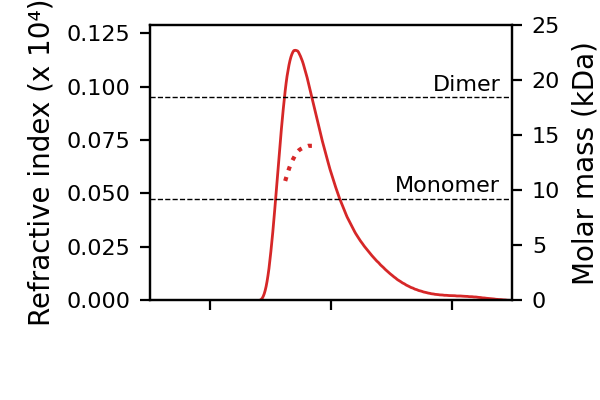

/Users/blandt/anaconda3/anaconda3/envs/membranequant/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
fig, ax1, ax2 = create_fig(csv_wt_750ugml, c='tab:red')
ax1.set_xlabel('')
ax1.set_xticklabels(['', '', ''])
fig.set_size_inches(3,2)
fig.subplots_adjust(left=0.25, bottom=0.25)
fig.savefig('Figs2022/wt_750.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


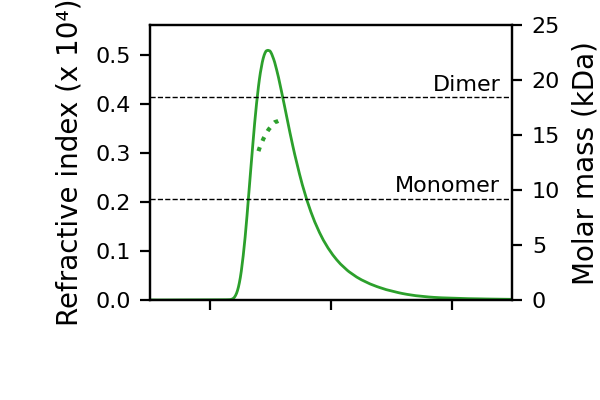

/Users/blandt/anaconda3/anaconda3/envs/membranequant/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
fig, ax1, ax2 = create_fig(csv_wt_2000ugml, c='tab:green')
ax1.set_xlabel('')
ax1.set_xticklabels(['', '', ''])
fig.set_size_inches(3,2)
fig.subplots_adjust(left=0.25, bottom=0.25)
fig.savefig('Figs2022/wt_2000.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


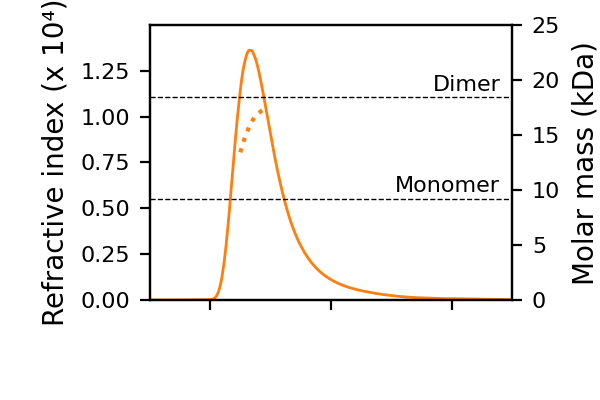

/Users/blandt/anaconda3/anaconda3/envs/membranequant/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
fig, ax1, ax2 = create_fig(csv_wt_5000ugml, c='tab:orange')
ax1.set_xlabel('')
ax1.set_xticklabels(['', '', ''])
fig.set_size_inches(3,2)
fig.subplots_adjust(left=0.25, bottom=0.25)
fig.savefig('Figs2022/wt_5000.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


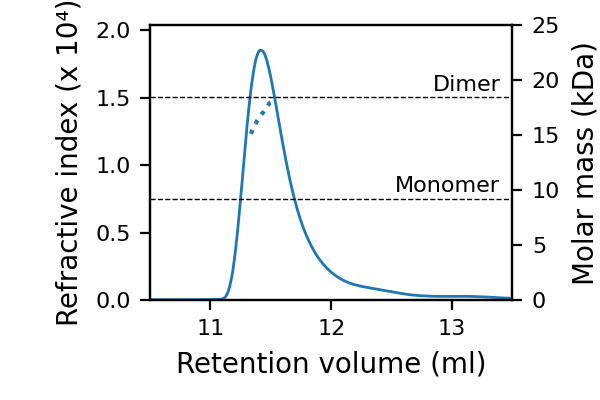

In [8]:
fig, ax1, ax2 = create_fig(csv_wt_10000ugml, c='tab:blue')
fig.set_size_inches(3,2)
fig.subplots_adjust(left=0.25, bottom=0.25)
fig.savefig('Figs2022/wt_10000.png', dpi=600, transparent=True)

### Combined fig

<IPython.core.display.Javascript object>


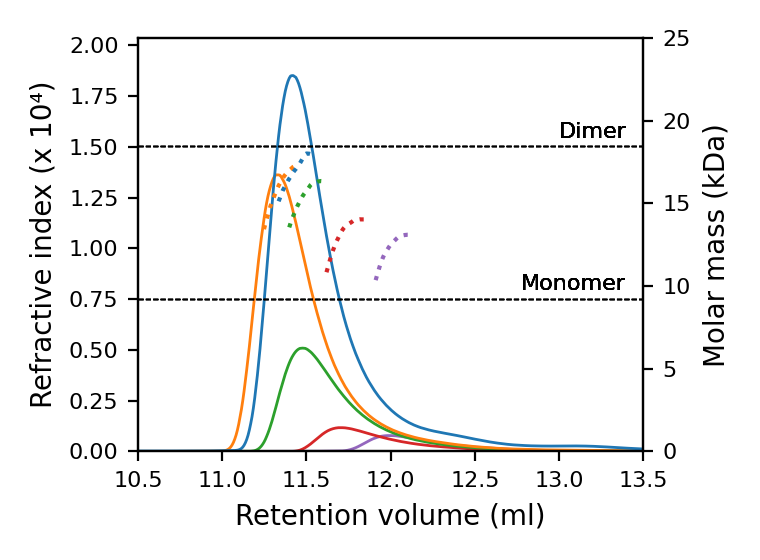

In [9]:
fig, ax1, ax2 = create_fig(csv_wt_500ugml, c='tab:purple')
fig, ax1, ax2 = create_fig(csv_wt_750ugml, fig=fig, ax1=ax1, ax2=ax2, c='tab:red')
fig, ax1, ax2 = create_fig(csv_wt_2000ugml, fig=fig, ax1=ax1, ax2=ax2, c='tab:green')
fig, ax1, ax2 = create_fig(csv_wt_5000ugml, fig=fig, ax1=ax1, ax2=ax2, c='tab:orange')
fig, ax1, ax2 = create_fig(csv_wt_10000ugml, fig=fig, ax1=ax1, ax2=ax2, c='tab:blue')
fig.set_size_inches(3.8,2.8)
fig.tight_layout()
fig.savefig('Figs2022/wt_titration.png', dpi=600, transparent=True)

### L109R

<IPython.core.display.Javascript object>


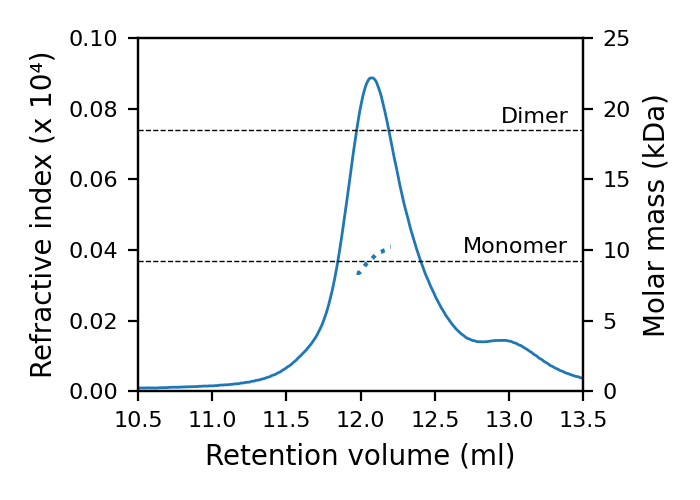

In [10]:
fig, ax1, ax2 = create_fig(csv_L109R, ylim1=[0, 0.1])
fig.set_size_inches(3.5,2.5)
fig.tight_layout()
fig.savefig('Figs2022/L109R.png', dpi=600, transparent=True)

In [11]:
# fig, ax1, ax2 = create_fig(csv_wt_500ugml, c='tab:blue')
# fig, ax1, ax2 = create_fig(csv_wt_750ugml, fig=fig, ax1=ax1, ax2=ax2, c='tab:orange', ylim1=[0, 0.12])
# fig.set_size_inches(3.5,2.5)
# fig.tight_layout()

### Test: titration

In [20]:
def correlation_fig(csv, xlim=[10.5, 13.5], c='tab:blue'):
    
    # Create figure
    fig, ax = plt.subplots()
    
    # Modify csv
    csv.columns = ['Time', 'RIU', 'Molar mass']
    csv.replace(' ', 'NaN', inplace=True)
    csv['Molar mass'] = csv['Molar mass'].astype(float)
    
    # Auto mol weight limits
    max_riu = np.max(csv.RIU[(csv.Time * 0.5 > xlim[0]) * (csv.Time * 0.5 < xlim[1])])
    thresh = 0.8 * max_riu 
    mw_xlim = csv.Time.values[np.abs(np.diff(np.sign(csv.RIU.values - thresh), prepend=0)) == 2] * 0.5
    
    # Crop mol weight data
    mw_bool = (csv.Time.values * 0.5 > mw_xlim[0]) * (csv.Time.values * 0.5 < mw_xlim[1])
    
    # Plot data    
    ax.scatter(np.mean(csv.RIU[mw_bool] * 10000), np.mean(csv['Molar mass'][mw_bool] / 1000), c=c)

<IPython.core.display.Javascript object>


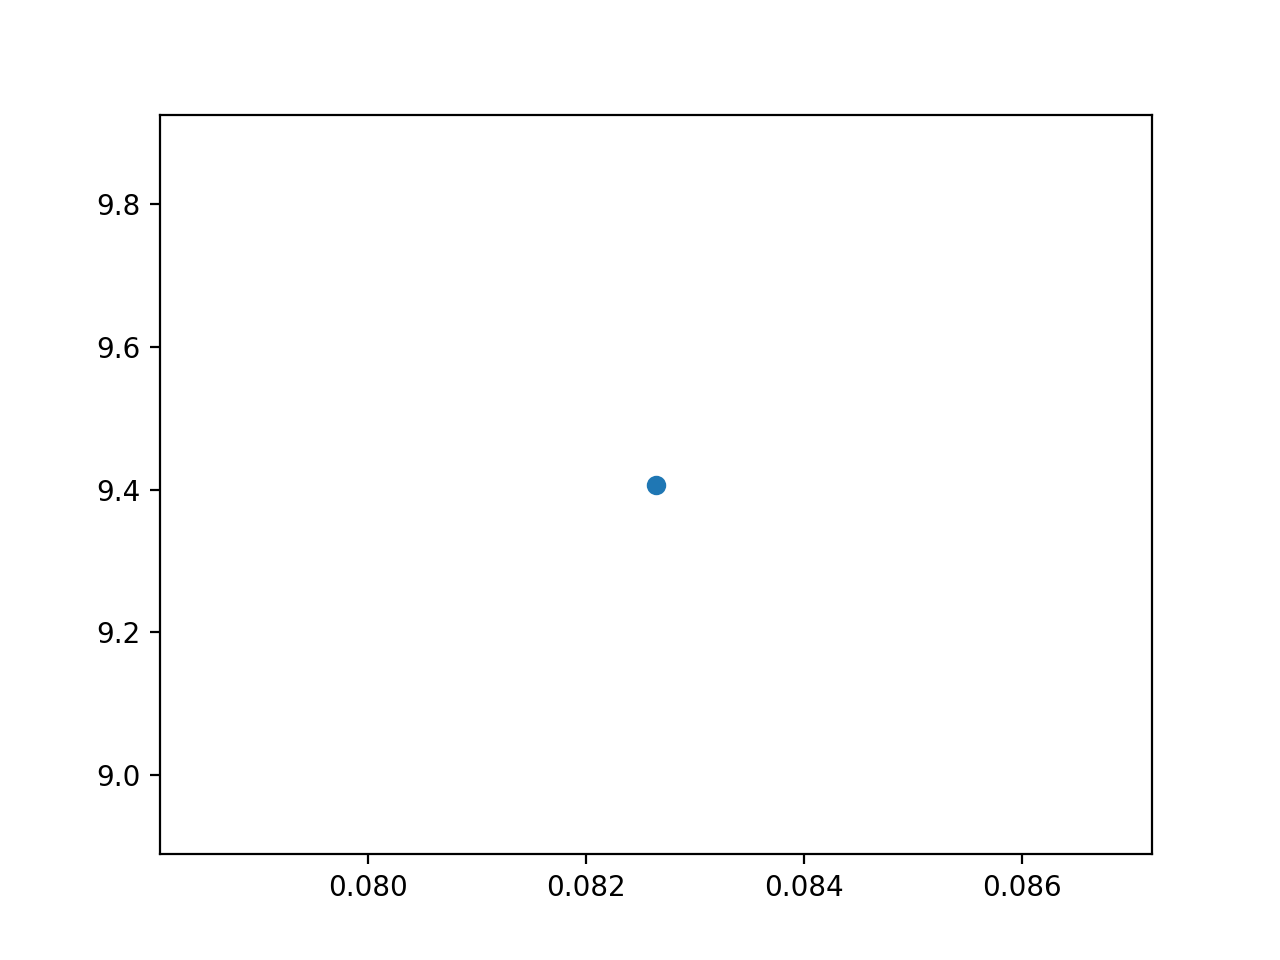

In [21]:
correlation_fig(csv_L109R, xlim=[10.5, 13.5], c='tab:blue')

### Test: peak area

In [26]:
def peak_area(csv, x, xlim=[10.5, 13.5], c='tab:blue', fig=None, ax=None):
    
    # Create figure
    if fig is None:
        fig, ax = plt.subplots()
    
    # Modify csv
    csv.columns = ['Time', 'RIU', 'Molar mass']
    csv.replace(' ', 'NaN', inplace=True)
    csv['Molar mass'] = csv['Molar mass'].astype(float)
    
    # Crop mol weight data
    riu_bool = (csv.Time.values * 0.5 > xlim[0]) * (csv.Time.values * 0.5 < xlim[1])
    
    # Plot data    
    ax.scatter(x, np.trapz(y=csv.RIU[riu_bool] * 10000, x=csv.Time.values[riu_bool] * 0.5))

<IPython.core.display.Javascript object>


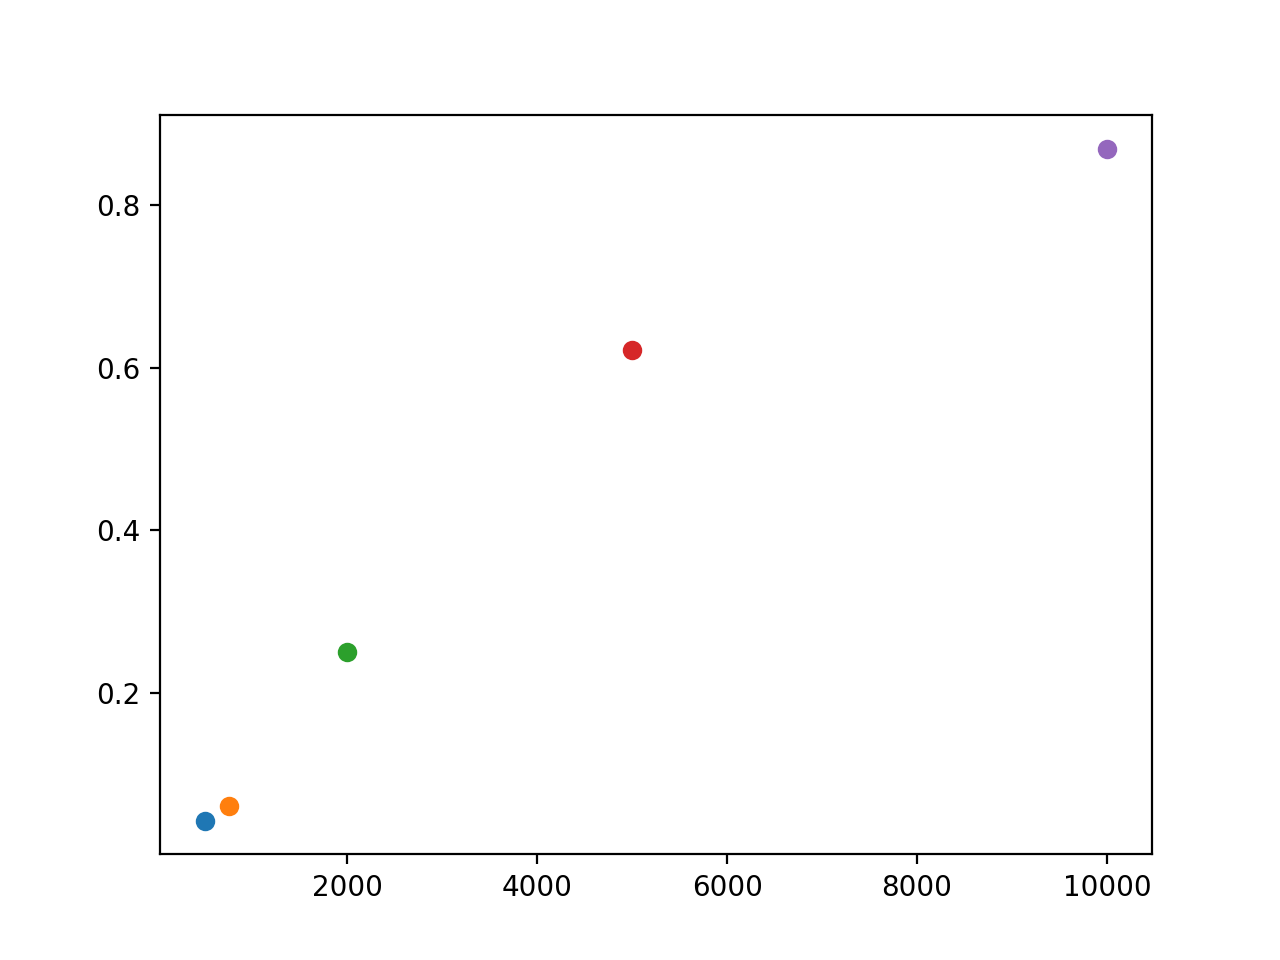

In [27]:
fig, ax = plt.subplots()
peak_area(csv_wt_500ugml, 500, fig=fig, ax=ax)
peak_area(csv_wt_750ugml, 750, fig=fig, ax=ax)
peak_area(csv_wt_2000ugml, 2000, fig=fig, ax=ax)
peak_area(csv_wt_5000ugml, 5000, fig=fig, ax=ax)
peak_area(csv_wt_10000ugml, 10000, fig=fig, ax=ax)